# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

#### Original Exploration
[13_Matplotlib_Format_Charts.ipynb](../2_Advanced/13_Matplotlib_Format_Charts.ipynb)

## Import Libraries and Data

In [25]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [26]:
df_IND = df[df['job_country'] == 'India']

In [33]:
df_skills = df_IND.explode('job_skills')
df_skills[["job_title","job_skills"]]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [105]:
df_skills_counts = df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_counts = df_skills_counts.reset_index(name ="skill count")
df_skills_counts.sort_values(by = "skill count", ascending = False, inplace = True)

df_skills_counts

,job_skills,job_title_short,skill count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [82]:
job_titles = df_skills_counts['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

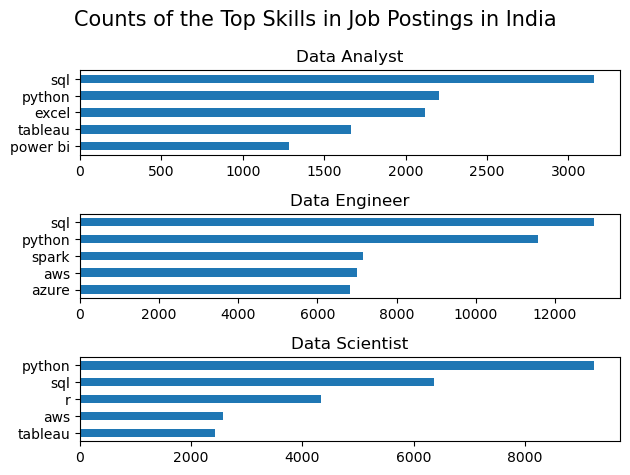

In [127]:
fig,ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_counts[df_skills_counts["job_title_short"] == job_title].head(5)
    df_plot.plot(kind ="barh",x ="job_skills",y ="skill count",ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().remove()

fig.suptitle("Counts of the Top Skills in Job Postings in India", fontsize = 15)
plt.tight_layout()
plt.show()




In [129]:
df_skills_counts 

,job_skills,job_title_short,skill count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [133]:
df_job_title_count = df_IND["job_title_short"].value_counts().reset_index(name = "jobs total")

df_job_title_count

,job_title_short,jobs total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [167]:
df_skills_perc = pd.merge(df_skills_counts,df_job_title_count, how="left", on = "job_title_short")
df_skills_perc["skill perc"] = df_skills_perc["skill count"] / df_skills_perc["jobs total"] * 100

df_skills_perc


,job_skills,job_title_short,skill count,jobs total,skill perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


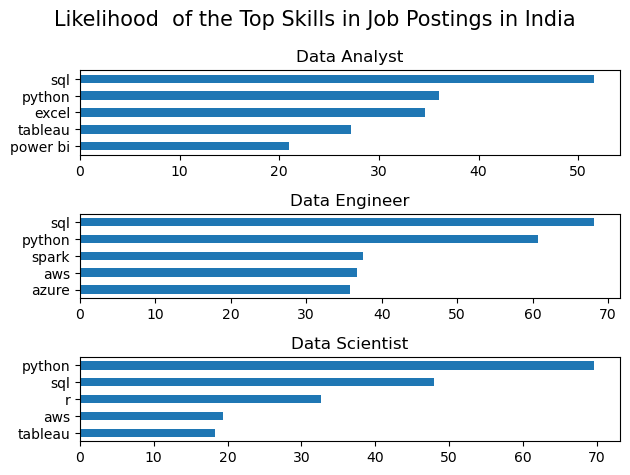

In [182]:
fig,ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    df_plot.plot(kind ="barh",x ="job_skills",y ="skill perc",ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().remove()

fig.suptitle("Likelihood  of the Top Skills in Job Postings in India", fontsize = 15)
plt.tight_layout()
plt.show()

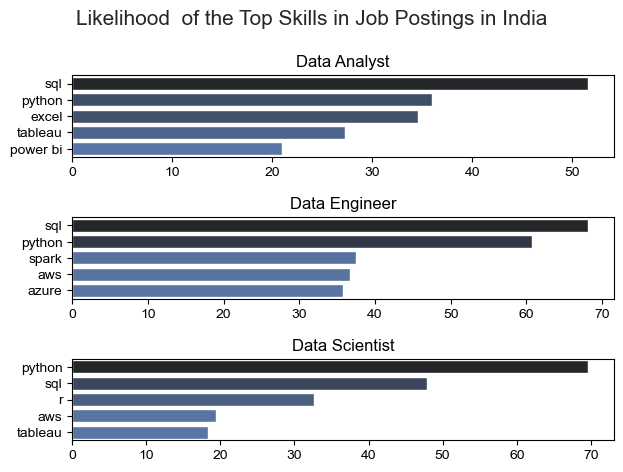

In [185]:
fig,ax = plt.subplots(len(job_titles),1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill perc', y='job_skills', ax=ax[i], hue='skill count', palette='dark:b_r')
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].legend().remove()
    ax[i].set_title(job_title)


fig.suptitle("Likelihood  of the Top Skills in Job Postings in India", fontsize = 15)
plt.tight_layout()
plt.show()